# ACLR Data Initial Graphs (draft 3)
### Jessica Ni, Maya Uwaydat, Wissal Khlouf

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('../Data/final_data_cleaned.csv')
flsi_percentiles = pd.read_csv('../Data/percentiles.csv')
data.head()

,record_id,redcap_event_name,sex_dashboard,age,age_group,acl_rsi,lsi_ext_isok_60,lsi_flex_isok_60,sh_lsi,visit_num
0,1,visit_1_arm_1,Unknown,21.7,5.0,87.5,87.86,103.32,97.68,1
1,2,visit_1_arm_1,Unknown,14.5,2.0,8.3,45.00,72.98,75.38,1
2,3,visit_1_arm_1,Unknown,14.0,2.0,94.2,81.53,81.11,95.20,1
3,4,visit_1_arm_1,Unknown,17.6,3.0,NaN,61.56,64.21,94.49,1
4,4,visit_2_arm_1,Unknown,18.2,4.0,76.7,76.20,81.86,96.54,2


### Graph 1: Flexion LSI over time

When it comes to a **patient** understanding **their** ACLR recovery, being able to visually see changes across time makes understanding their recovery progress easier. Through a line plot, a patient can visually see that progression over multiple visits, allowing them to notice any irregularities that go against the general pattern, which is usually an increase in the recovery statistic. Additionally, having a background population of patients who also underwent ACLR surgery acts as a comparison point, allowing them to compare themselves to a group of people who have gone through a similar recovery process. Having the patient be able to picture themselves in the data is important, as we want for them to understand where they stand in recovery without explicitly knowing miniscule details about medical terminology. Sometimes, seeing yourself as a positive sloping line among a positive sloping population is enough to understand that recovery is going smoothly.

This is a line graph that captures a single patient's recovery progress for Flexion LSI (I randomly chose a patient who had at least 4 visits). Additionally, it has Flexion LSI data over visits from all the patients in the study, which acts as a comparison point for the patient. The population data is shaded to show the IQR, which is the 25th to 75th percentile. My goal is for the patient to be able to picture himself/herself in recovery and understand that test results usually get better over time.

In [2]:
# Jessica

# This is all commented out because I added my datacleaning into the datacleaning file (datacleaning_forbook.ipynb -> datacleaning_forbook.qmd) for the final book

# # Prepare data for graph
# # Find the 25th and 75th percentile for each visit (1,2,3,4,...)
# flsi_percentiles = data.groupby('redcap_event_name')['lsi_flex_isok_60'].agg(mean='mean',q25='quantile', q75='quantile').reset_index()
# flsi_percentiles['q25'] = data.groupby('redcap_event_name')['lsi_flex_isok_60'].quantile(0.40).values
# flsi_percentiles['q75'] = data.groupby('redcap_event_name')['lsi_flex_isok_60'].quantile(0.60).values

# visit_map = {
#     'visit_1_arm_1': 1,
#     'visit_2_arm_1': 2,
#     'visit_3_arm_1': 3,
#     'visit_4_arm_1': 4,
#     'visit_5_arm_1': 5,
#     'visit_6_arm_1': 6,
#     'visit_7_arm_1': 7,
#     'visit_8_arm_1': 8,
#     'visit_9_arm_1': 9}

# # Create a new column with just the visit number
# flsi_percentiles['visit_num'] = flsi_percentiles['redcap_event_name'].map(visit_map)
# flsi_percentiles['visit_num'] = pd.to_numeric(flsi_percentiles['visit_num'], errors='coerce').astype('Int64')
# flsi_percentiles = flsi_percentiles[flsi_percentiles['redcap_event_name'] != 'data_upload_arm_2'] # remove unneeded values

# # In original dataset, create new column with just the visit number as well
# data['visit_num'] = data['redcap_event_name'].map(visit_map)
# flsi_percentiles['visit_num'] = pd.to_numeric(flsi_percentiles['visit_num'], errors='coerce').astype('Int64')

# flsi_percentiles.head()

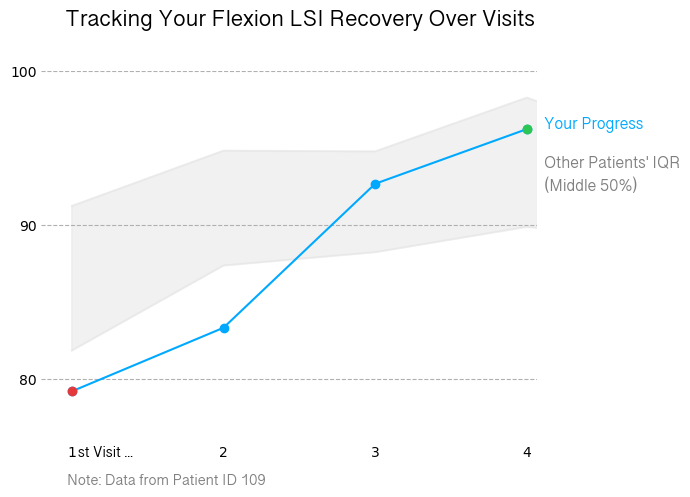

In [3]:
# Plot IQR 25 to 75, and fill the space between
plt.plot(flsi_percentiles['visit_num'], flsi_percentiles['q25'], color="#E5E5E5", alpha=0.5)
plt.plot(flsi_percentiles['visit_num'], flsi_percentiles['q75'], color="#E5E5E5", alpha=0.5)
plt.fill_between(flsi_percentiles['visit_num'], 
                 flsi_percentiles['q25'], 
                 flsi_percentiles['q75'], color="#E5E5E5", alpha=0.5, label = 'patients')

# Choose a patient to showcase their recovery progress
highlight_data = data[data['record_id'] == 109]

# Line plot of recovery
plt.plot(highlight_data['visit_num'], highlight_data['lsi_flex_isok_60'],
         linestyle='-', marker='o', color='#00A9FF', label='You')

# Add colored dots
plt.plot(highlight_data['visit_num'].iloc[0], highlight_data['lsi_flex_isok_60'].iloc[0], marker='o', color='#E5383B', markersize=6)
plt.plot(highlight_data['visit_num'].iloc[3], highlight_data['lsi_flex_isok_60'].iloc[3], marker='o', color='#2DC653', markersize=6)

# Add titles/labels/text
plt.title('Tracking Your Flexion LSI Recovery Over Visits', weight='bold', size=17, x=0.522, y=1.1, fontfamily='Sinhala Sangam MN')
plt.figtext(0.91, 0.76, 'Your Progress', size = 12, color='#00A9FF', fontfamily='Sinhala Sangam MN')
plt.figtext(0.91, 0.68, "Other Patients' IQR", size = 12, color='gray', fontfamily='Sinhala Sangam MN')
plt.figtext(0.91, 0.63, "(Middle 50%)", size = 12, color='gray', fontfamily='Sinhala Sangam MN')
plt.figtext(0.182, 0.0755, "st Visit ...", size = 11, color='black', fontfamily='Sinhala Sangam MN')
plt.figtext(0.165, 0.019, "Note: Data from Patient ID 109", size = 11, color='gray', fontfamily='Sinhala Sangam MN')

# Customize graph
plt.xlim(.8, 4.07)
plt.xticks([1, 2, 3, 4])
plt.ylim(76, 100)
plt.yticks([80, 90, 100])

plt.tick_params(axis='y', which='both',length=0)
plt.tick_params(axis='x', which='both',length=0)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.grid(axis='y', linestyle = '--')

# Fonts: STIX Two Text, Sinhala Sangam MN, Iowan Old Style

#### JESSICA: on this copy, i've deleted the font commands. that's just because...
# ...they generate long strings of error messages when i try to run my code and it's obstructed...
# ...my ability to see everything. 
# we will re-add them in our final codebook!

### Graph 2: Psychological Readiness Over Time

We created another line plot that shows ACLR patients' psychological readiness over time to likewise allow them to understand the recovery trajectories of themselves and others. Like the first plot, it highlights the 25th and 75th quantiles in addition to the IQR; and for the sake of consistency, it features patient 109 again. Their recovery trajectory is unusual—they start with a psychological readiness score very close to the lowest possible number—but they recover rapidly after their third visit, exceeding the median possible score. Their upward trajectory is easily understood through a medium that conveys their progress visually. 

If a child feels unconfident about their ability to participate in sport after injury, and worries that they will never feel ready to return, they may be reassured by the fact that the average patient eventually recovers emotionally.

In [4]:
visit_map = {
    'visit_1_arm_1': 1,
    'visit_2_arm_1': 2,
    'visit_3_arm_1': 3,
    'visit_4_arm_1': 4,
    'visit_5_arm_1': 5,
    'visit_6_arm_1': 6,
    'visit_7_arm_1': 7,
    'visit_8_arm_1': 8,
    'visit_9_arm_1': 9}

# prepare data for graph 
aclrsi_percentiles = data.groupby('redcap_event_name')['acl_rsi'].agg(mean='mean',q25='quantile', q75='quantile').reset_index()
# find percentiles for graph 
aclrsi_percentiles['q25'] = data.groupby('redcap_event_name')['acl_rsi'].quantile(0.40).values
aclrsi_percentiles['q75'] = data.groupby('redcap_event_name')['acl_rsi'].quantile(0.60).values

# new column with just visit number (the groupby made it disappear when taking...
# ...our percentiles from the original dataset
aclrsi_percentiles['visit_num'] = flsi_percentiles['redcap_event_name'].map(visit_map)
aclrsi_percentiles['visit_num'] = pd.to_numeric(aclrsi_percentiles['visit_num'], errors='coerce').astype('Int64')
aclrsi_percentiles = aclrsi_percentiles[aclrsi_percentiles['redcap_event_name'] != 'data_upload_arm_2'] # remove unneeded values

# it is worth investigating what our new dataframe aclrsi_percentiles has in it though.
aclrsi_percentiles.head()

,redcap_event_name,mean,q25,q75,visit_num
0,visit_1_arm_1,62.376789,56.82,73.30,1
1,visit_2_arm_1,73.138792,70.00,83.00,2
2,visit_3_arm_1,79.853907,82.00,91.70,3
3,visit_4_arm_1,78.956757,78.20,90.08,4
4,visit_5_arm_1,68.329412,58.20,83.00,5


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

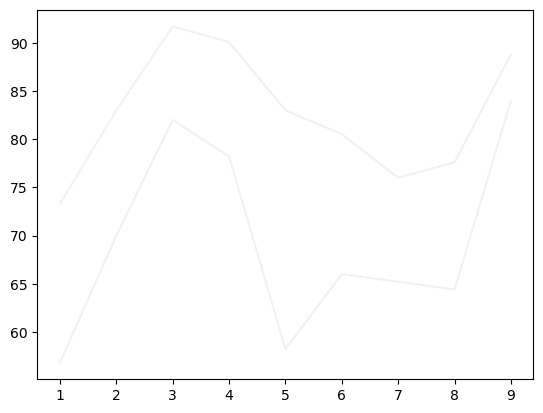

In [5]:
# plot IQR graph, fill space.
plt.plot(aclrsi_percentiles['visit_num'], aclrsi_percentiles['q25'], color="#E5E5E5", alpha=0.5)
plt.plot(aclrsi_percentiles['visit_num'], aclrsi_percentiles['q75'], color="#E5E5E5", alpha=0.5)
plt.fill_between(aclrsi_percentiles['visit_num'], 
                 aclrsi_percentiles['q25'], 
                 aclrsi_percentiles['q75'], color="#E5E5E5", alpha=0.5, label = 'patients')

# choose patient show recovery progress
# i am choosing the same patient as the previous graph for the sake of consistency
highlight_data = data[data['record_id'] == 109]

# line plot of recovery 
plt.plot(highlight_data['visit_num'], highlight_data['acl_rsi'],
         linestyle='-', marker='o', color='#00A9FF', label='You')

# coloured dots
plt.plot(highlight_data['visit_num'].iloc[0], highlight_data['acl_rsi'].iloc[0], marker='o', color='#E5383B', markersize=6)
plt.plot(highlight_data['visit_num'].iloc[3], highlight_data['acl_rsi'].iloc[3], marker='o', color='#2DC653', markersize=6)

# titles labels text
plt.title('Tracking Your ACL-RSI Over Visits', weight='bold', size=17, x=0.522, y=1.1)
plt.figtext(0.91, 0.57, 'Your Progress', size = 12, color='#00A9FF')
plt.figtext(0.91, 0.77, "Other Patients' IQR", size = 12, color='gray')
plt.figtext(0.91, 0.72, "(Middle 50%)", size = 12, color='gray')
plt.figtext(0.182, 0.0755, "st Visit ...", size = 11, color='black')
plt.figtext(0.165, 0.019, "Note: Data from Patient ID 109", size = 11, color='gray')
# i got rid of all the font family stuff for ease on my eyes. i need to ask jessica...
# ...where she got her fonts lol


# customise parameters of graph 
plt.xlim(.8, 4.07)
plt.xticks([1, 2, 3, 4])
plt.ylim(0, 100)
plt.yticks([0, 50, 100])

plt.tick_params(axis='y', which='both',length=0)
plt.tick_params(axis='x', which='both',length=0)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.grid(axis='y', linestyle = '--')

### Graph 3: Single Hop Symmetry Over Time
This graph shows Patient 109’s Single Hop Limb Symmetry Index (LSI) over the course of their follow-up visits after ACL reconstruction. The blue line represents the patient’s performance over time, and the red marker highlights their first recorded visit. There is no green marker, as a fourth visit was not recorded for this patient. Patient 109 was used across multiple graphs to maintain consistency in analysis and storytelling.

The gray shaded area shows the interquartile range (IQR) (the middle 50%) of scores from other patients at each visit. This provides helpful context for comparing individual progress against a larger recovery population.

While this patient currently has data through only three visits, this graph serves as a powerful reflection of early progress and also a motivational tool. As the LSI value increases and trends closer to or above the peer range, it signals stronger lower limb symmetry, a key milestone toward safe return to activity. The patient can use this trajectory to look forward to continued improvements in function and performance with ongoing rehab.

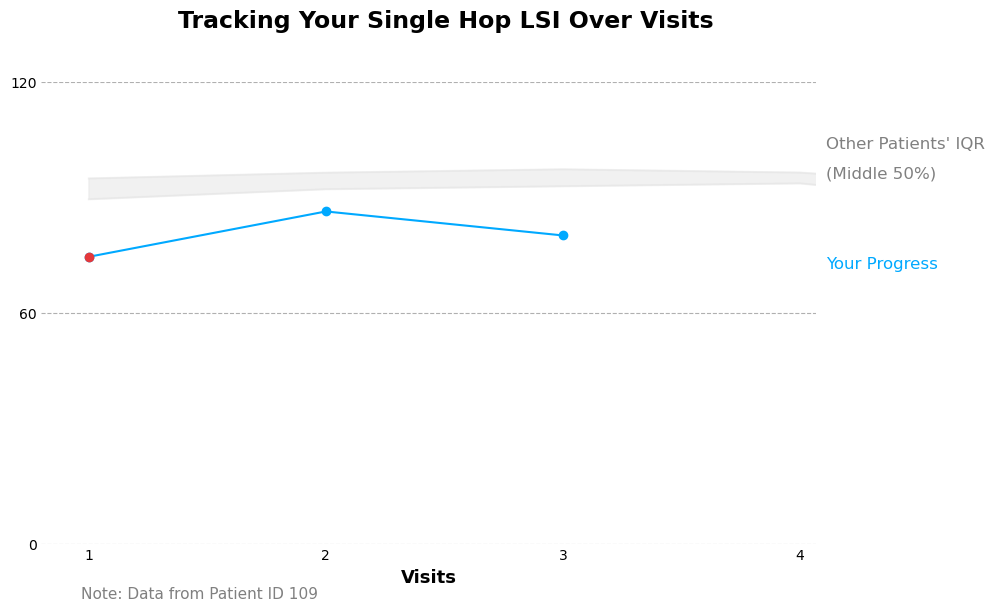

In [6]:
# Map visit names to visit numbers
visit_map = {
    'visit_1_arm_1': 1,
    'visit_2_arm_1': 2,
    'visit_3_arm_1': 3,
    'visit_4_arm_1': 4,
    'visit_5_arm_1': 5,
    'visit_6_arm_1': 6,
    'visit_7_arm_1': 7,
    'visit_8_arm_1': 8,
    'visit_9_arm_1': 9
}
data['visit_num'] = data['redcap_event_name'].map(visit_map)

# Calculate 40th and 60th percentiles for sh_lsi for each visit
sh_lsi_percentiles = data.groupby('redcap_event_name')['sh_lsi'].agg(
    q25=lambda x: x.quantile(0.40),
    q75=lambda x: x.quantile(0.60)
).reset_index()
sh_lsi_percentiles['visit_num'] = sh_lsi_percentiles['redcap_event_name'].map(visit_map)
sh_lsi_percentiles = sh_lsi_percentiles[sh_lsi_percentiles['redcap_event_name'] != 'data_upload_arm_2']

# Filter for Patient 109 
# (same patient used for consistency)
highlight_data = data[data['record_id'] == 109]

# Plot IQR shading for other patients
plt.figure(figsize=(10, 6))
plt.plot(sh_lsi_percentiles['visit_num'], sh_lsi_percentiles['q25'], color="#E5E5E5", alpha=0.5)
plt.plot(sh_lsi_percentiles['visit_num'], sh_lsi_percentiles['q75'], color="#E5E5E5", alpha=0.5)
plt.fill_between(sh_lsi_percentiles['visit_num'],
                 sh_lsi_percentiles['q25'],
                 sh_lsi_percentiles['q75'], color="#E5E5E5", alpha=0.5, label="Other Patients' IQR")

# Plot Patient 109's Single Hop LSI
plt.plot(highlight_data['visit_num'], highlight_data['sh_lsi'],
         linestyle='-', marker='o', color='#00A9FF', label='You')

# Highlight only available start point
plt.plot(highlight_data['visit_num'].iloc[0], highlight_data['sh_lsi'].iloc[0], marker='o', color='#E5383B', markersize=6)

# Titles, labels, annotations
plt.title('Tracking Your Single Hop LSI Over Visits', weight='bold', size=17, x=0.522, y=1.1)
plt.figtext(0.91, 0.57, 'Your Progress', size=12, color='#00A9FF')
plt.figtext(0.91, 0.77, "Other Patients' IQR", size=12, color='gray')
plt.figtext(0.91, 0.72, "(Middle 50%)", size=12, color='gray')
plt.figtext(0.165, 0.019, "Note: Data from Patient ID 109", size=11, color='gray')

# axis parameters
plt.xlim(.8, 4.07)
plt.xticks([1, 2, 3, 4])
plt.ylim(0, 120)
plt.yticks([0, 60, 120])
plt.xlabel('Visits', fontsize=13, weight='bold')


plt.tick_params(axis='y', which='both', length=0)
plt.tick_params(axis='x', which='both', length=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(axis='y', linestyle='--')

plt.show()

### Graph 4: Probability Distribution of ACL-RSI scores
Though the lineplot is useful for showcasing an individual patient's progress over time, it is not effective for portraying the distribution of the ACL-RSI scores; therefore, we want to use a kernel density estimate plot stratified by visit number. We deliberately excluded 5th, 7th, 7th, 8th, and 9th visits to keep consistency with the line plots.

Compared to line plots, the KDEplot is less familiar most people, and it will most certainly be unfamiliar to our target audience. Therefore, our graph includes an explanation of what it is supposed to portray. We hope that our visualization will demonstrate that people are *more likely* to have higher ACL-RSI scores as time passes and reassure patients who fear they will never feel ready to return to sport.

In [35]:
# importing packages
import seaborn as sns

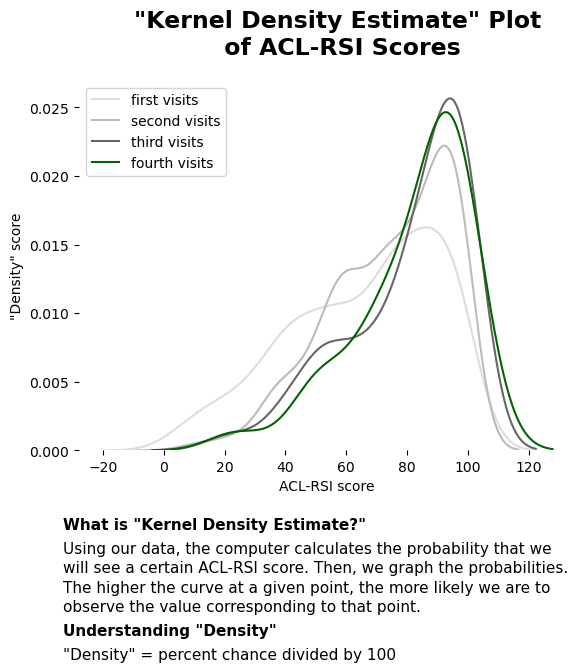

In [7]:
# plotting kernel density estimate plots
sns.kdeplot(data=data.where(data["visit_num"]==1).dropna(), x="acl_rsi", color="#DDDDDD")
sns.kdeplot(data=data.where(data["visit_num"]==2).dropna(), x="acl_rsi", color="#BBBBBB")
sns.kdeplot(data=data.where(data["visit_num"]==3).dropna(), x="acl_rsi", color="#666666")
sns.kdeplot(data=data.where(data["visit_num"]==4).dropna(), x="acl_rsi", color="#006500")

# customising text
plt.title('"Kernel Density Estimate" Plot\n of ACL-RSI Scores', weight='bold', size=17, x=0.522, y=1.05)
plt.xlabel("ACL-RSI score")
plt.ylabel('"Density" score')

# clarifying notes for the audience on what "kde" is for our "audience"
plt.figtext(0.100, -0.0555, 'What is "Kernel Density Estimate?"', size = 11, color='black', weight="bold")
plt.figtext(0.100, -0.105, 'Using our data, the computer calculates the probability that we', size = 11, color='black')
plt.figtext(0.100, -0.145, 'will see a certain ACL-RSI score. Then, we graph the probabilities.', size = 11, color='black')
plt.figtext(0.100, -0.185, 'The higher the curve at a given point, the more likely we are to', size = 11, color='black')
plt.figtext(0.100, -0.225, 'observe the value corresponding to that point.', size = 11, color='black')
plt.figtext(0.100, -0.275, 'Understanding "Density"', size = 11, color='black', weight="bold")
plt.figtext(0.100, -0.3245, '"Density" = percent chance divided by 100', size = 11, color='black')

# violently despining the graph lol 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# legend
plt.legend(["first visits", "second visits", "third visits", "fourth visits"])

### Graph 5: Distribution of LSI Extension Strength by Age Group

The box plot offers a more familiar and straightforward way to visualize data for our target audience of young athletes. Each box represents the interquartile range (IQR) of LSI Extension Strength (60°/s) within an age group, while the whiskers show variability and the dots highlight outliers. This format allows patients and their families to quickly understand how their strength compares to others in their age group. The visualization reassures patients that some variation is normal and that most people fall within a certain performance band, particularly as they progress in recovery. By stratifying the data by age group, we emphasize that strength recovery can vary with age, which is helpful for setting age-appropriate expectations during rehab.

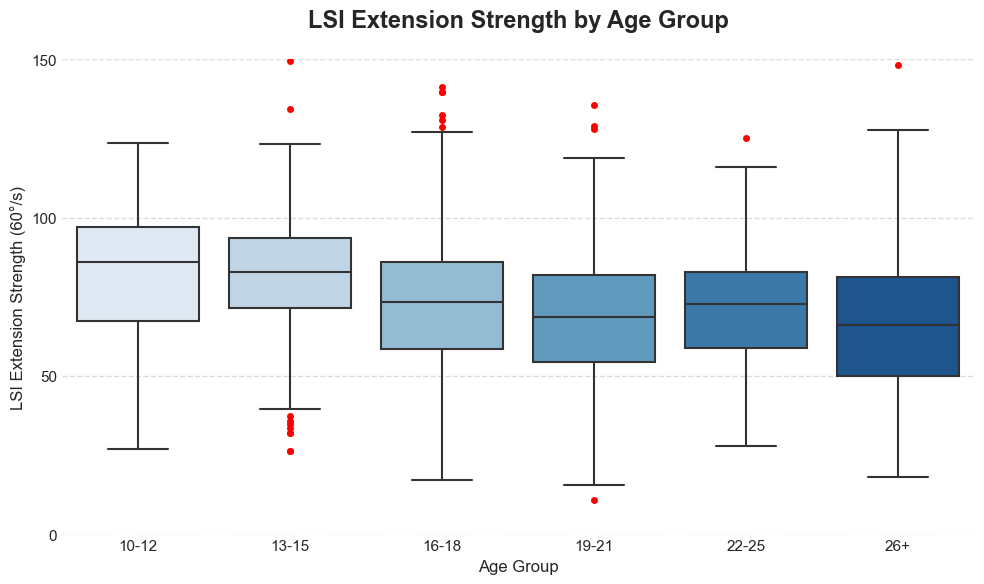

In [10]:

bins = [0, 12, 15, 18, 21, 25, 100]
labels = ['10-12', '13-15', '16-18', '19-21', '22-25', '26+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

box_data = data[['age_group', 'lsi_ext_isok_60']].dropna()
box_data = box_data[box_data['age_group'].isin(labels)]


age_order = labels  # you already have them in the right order


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
flierprops = dict(marker='o', markerfacecolor='red', markeredgecolor='red', markersize=4, linestyle='none')

ax = sns.boxplot(
    x='age_group',
    y='lsi_ext_isok_60',
    data=box_data,
    palette="Blues",
    flierprops=flierprops,
    order=age_order  
)

ax.set_title('LSI Extension Strength by Age Group', weight='bold', size=17, x=0.5, y=1.05)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('LSI Extension Strength (60°/s)', fontsize=12)

plt.ylim(0, 150)
plt.yticks([0, 50, 100, 150])
plt.tick_params(axis='y', which='both', length=0)
plt.tick_params(axis='x', which='both', length=0)

for spine in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[spine].set_visible(False)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
